In [2]:
import pandas as pd


In [10]:


df = pd.read_csv(r"C:\Users\kumud\OneDrive\Desktop\capstone project\database.csv")






In [11]:
print(df.head())

         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                   

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [15]:
print(df.columns)


Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')


In [17]:
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth',
         'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
         'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
         'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
         'Source', 'Location Source', 'Magnitude Source', 'Status']]

print(df.head())

         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                   

In [18]:
df = df.dropna()


In [20]:
print(" Mean Depth:", df['Depth'].mean())
print(" Max Magnitude:", df['Magnitude'].max())
print("Min Magnitude:", df['Magnitude'].min())


 Mean Depth: 9.107857142857144
 Max Magnitude: 6.2
Min Magnitude: 5.52


In [21]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # convert to date
df['Year'] = df['Date'].dt.year

# Group by year
yearly_quakes = df.groupby('Year')['ID'].count()
print(yearly_quakes)


Year
1966    1
1968    2
1969    1
1970    1
1973    1
1974    1
1975    2
1976    1
1980    2
2008    1
2014    1
Name: ID, dtype: int64


In [23]:
print(" Top 5 Deepest Earthquakes:")
print(df.sort_values(by='Depth', ascending=False)[['Date', 'Type', 'Depth']].head(5))

print("\n Top 5 Strongest Earthquakes:")
print(df.sort_values(by='Magnitude', ascending=False)[['Date', 'Type', 'Magnitude']].head(5))


🌍 Top 5 Deepest Earthquakes:
            Date               Type  Depth
22238 2014-05-28         Earthquake   90.0
18876 2008-02-21         Earthquake    7.9
3516  1975-06-26  Nuclear Explosion    6.0
3307  1974-11-22         Earthquake    6.0
5631  1980-09-07         Earthquake    6.0

🌟 Top 5 Strongest Earthquakes:
            Date               Type  Magnitude
18876 2008-02-21         Earthquake       6.20
3754  1976-01-03  Nuclear Explosion       5.84
1380  1969-09-16  Nuclear Explosion       5.82
22238 2014-05-28         Earthquake       5.80
5523  1980-05-18         Earthquake       5.70


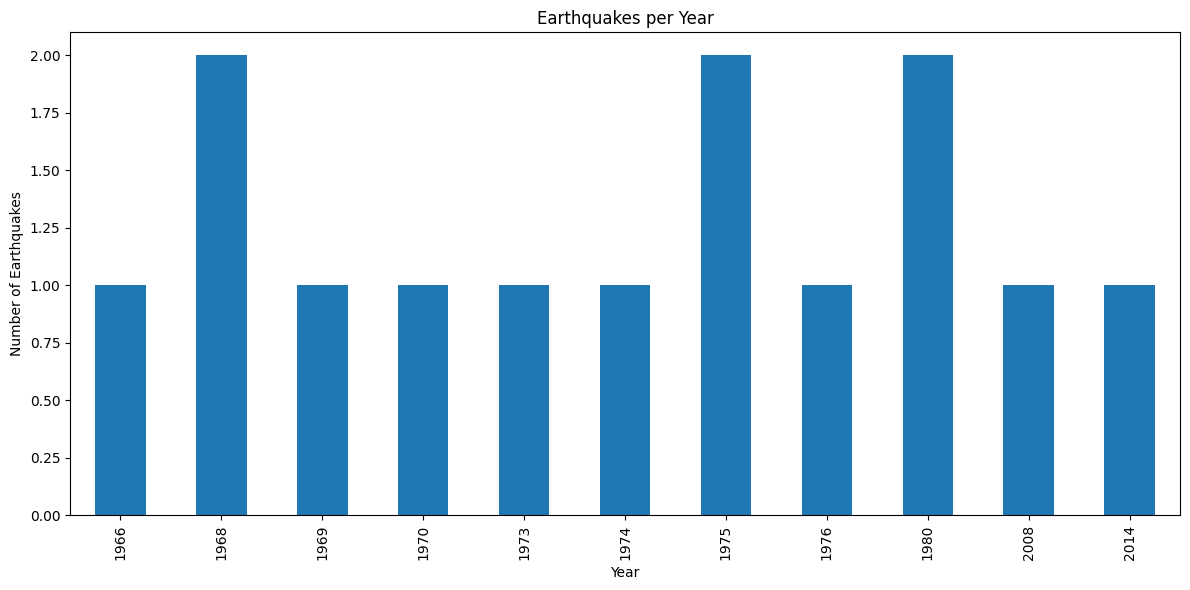

In [24]:
import matplotlib.pyplot as plt

# Plot earthquakes per year
yearly_quakes.plot(kind='bar', figsize=(12, 6), title="Earthquakes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.tight_layout()
plt.show()


In [25]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Converts string to real date
df['Year'] = df['Date'].dt.year  # Adds a new column with just the year


In [26]:
yearly_quakes = df['Year'].value_counts().sort_index()  # Counts earthquakes per year
print(yearly_quakes)


Year
1966    1
1968    2
1969    1
1970    1
1973    1
1974    1
1975    2
1976    1
1980    2
2008    1
2014    1
Name: count, dtype: int64


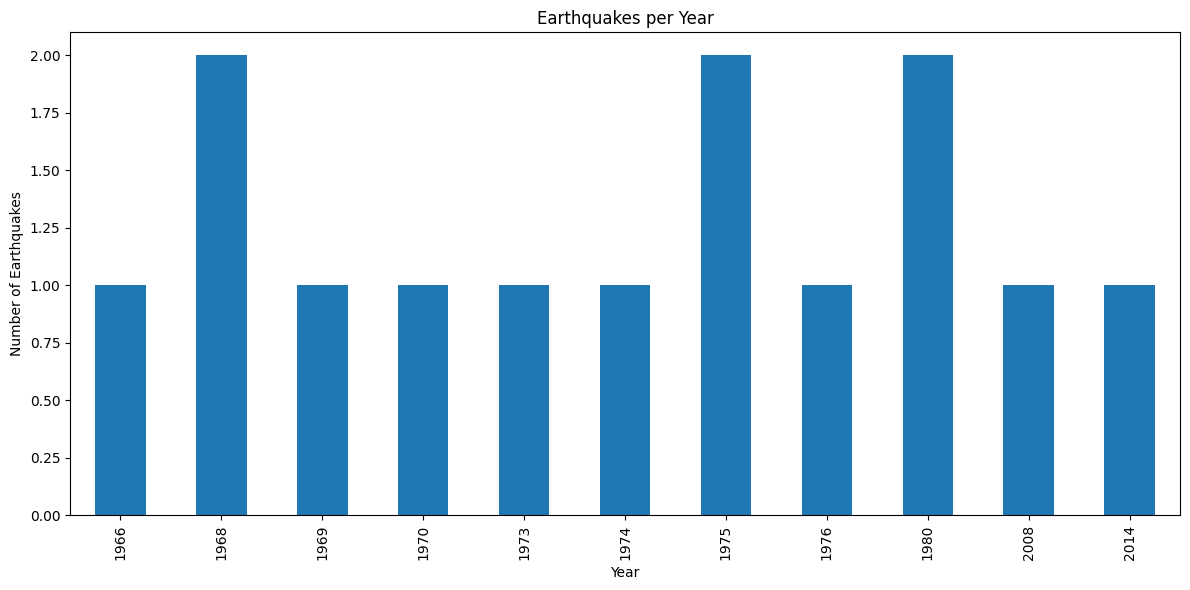

In [27]:
import matplotlib.pyplot as plt

yearly_quakes.plot(kind='bar', figsize=(12, 6), title="Earthquakes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.tight_layout()
plt.show()


In [28]:
bins = [0, 70, 300, 700]  # Depth levels
labels = ['Shallow (0-70km)', 'Intermediate (70-300km)', 'Deep (300-700km)']

df['Depth Range'] = pd.cut(df['Depth'], bins=bins, labels=labels)

depth_group = df['Depth Range'].value_counts()
print(depth_group)


Depth Range
Shallow (0-70km)           13
Intermediate (70-300km)     1
Deep (300-700km)            0
Name: count, dtype: int64


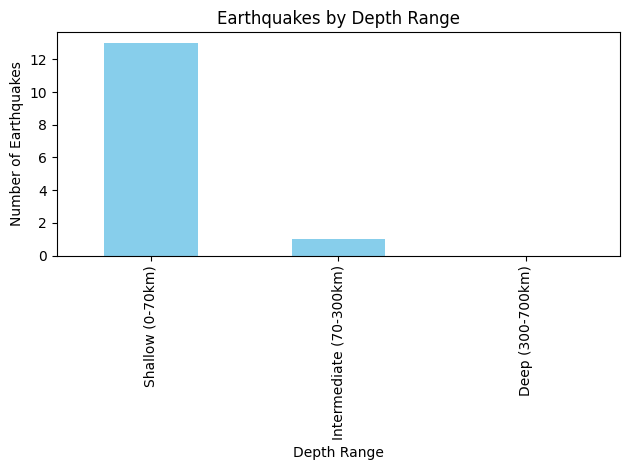

In [29]:
depth_group.plot(kind='bar', color='skyblue', title="Earthquakes by Depth Range")
plt.xlabel("Depth Range")
plt.ylabel("Number of Earthquakes")
plt.tight_layout()
plt.show()


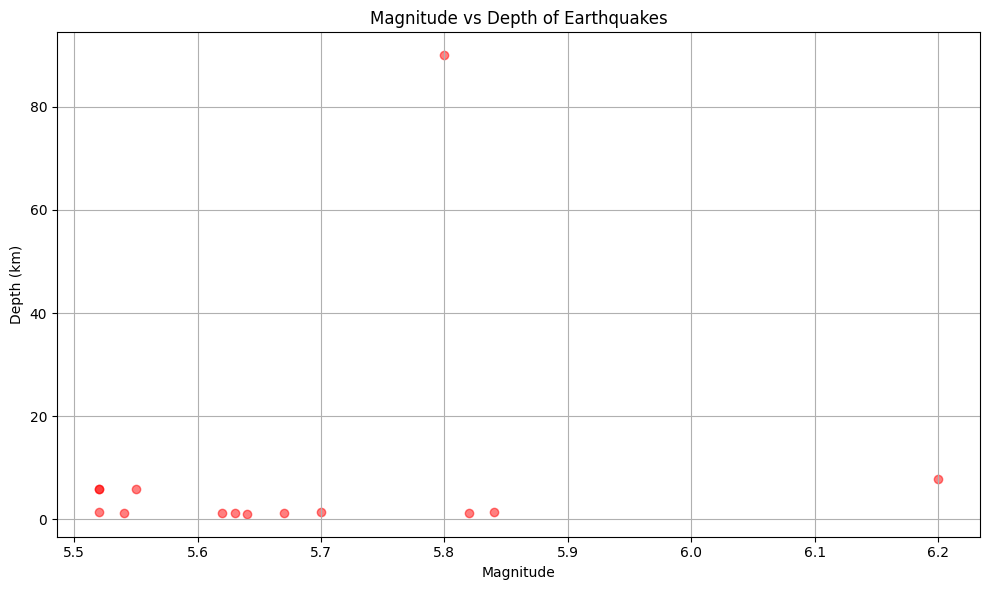

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df['Magnitude'], df['Depth'], alpha=0.5, c='red')
plt.title('Magnitude vs Depth of Earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
df.to_csv("cleaned_earthquake_data.csv", index=False)


In [32]:
print(df.columns)


Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status', 'Year',
       'Depth Range'],
      dtype='object')


In [2]:
pip install numpy==1.26.4


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   -- ------------------------------------- 1.0/15.5 MB 5.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/15.5 MB 4.4 MB/s eta 0:00:04
   ------ --------------------------------- 2.4/15.5 MB 4.3 MB/s eta 0:00:04
   ------- -------------------------------- 2.9/15.5 MB 3.4 MB/s eta 0:00:04
   -------- ------------------------------- 3.4/15.5 MB 3.5 MB/s eta 0:00:04
   ---------- ----------------------------- 4.2/15.5 MB 3.4 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/15.5 MB 3.4 MB/s eta 0:00:04
   -------------- ------------------------- 5.5/15.5 MB 3.4 MB/s eta 0:00:03
   ---------------- ----------------------- 6.3/15.5 MB 3.4 MB/s eta 0:00:03
   ------------------ --------------------- 7.1/15.5 MB 3.5 MB/s eta 0:00:03
   -------------------- ------------------- 8.1/15.5 MB 3.5 MB/s eta 0:00:03
   ---------------------- ----------------- 8.9/15.5 MB 3.6 MB/s eta 0:00:02
   ---

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.2.1 which is incompatible.
streamlit 1.37.1 requires rich<14,>=10.14.0, but you have rich 14.0.0 which is incompatible.


In [ ]:
!pip install mysql-connector-python


In [3]:
%pip install mysql-connector-python


  Using cached mysql_connector_python-9.3.0-cp312-cp312-win_amd64.whl.metadata (7.7 kB)
Using cached mysql_connector_python-9.3.0-cp312-cp312-win_amd64.whl (16.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import mysql.connector

# Load cleaned DataFrame
df = pd.read_csv("cleaned_earthquake_data.csv")

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",       
    user="root",             
    password="binue111", 
    database="earthquake_db"
)

cursor = conn.cursor()

# Insert data into the table
for index, row in df.iterrows():
    try:
        cursor.execute("""
            INSERT INTO earthquakes (Date, Time, Latitude, Longitude, Type, Depth, Magnitude, Magnitude_Type, Year, Depth_Range)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """, (
            row['Date'], row['Time'], row['Latitude'], row['Longitude'], row['Type'], row['Depth'],
            row['Magnitude'], row['Magnitude Type'], row['Year'], row['Depth Range']
        ))
    except Exception as e:
        print(f"Error at row {index}: {e}")

# Commit and close connection
conn.commit()
conn.close()

print("✅ All data inserted into MySQL successfully.")


✅ All data inserted into MySQL successfully.
